In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
# пропущенные значения (часть 1)

In [103]:
# выявление пропусков

In [104]:
titanic = pd.read_csv('train.csv')

In [105]:
# базовые методы
# метод INFO

In [106]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
titanic.Age.astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# методы isna / sum

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# процент пропущенных значений

In [ ]:
(titanic.isna().sum()/len(titanic)).round(4)*100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
# библиотека missingno

In [ ]:
import missingno as msno

In [ ]:
sns.set()

<Axes: >

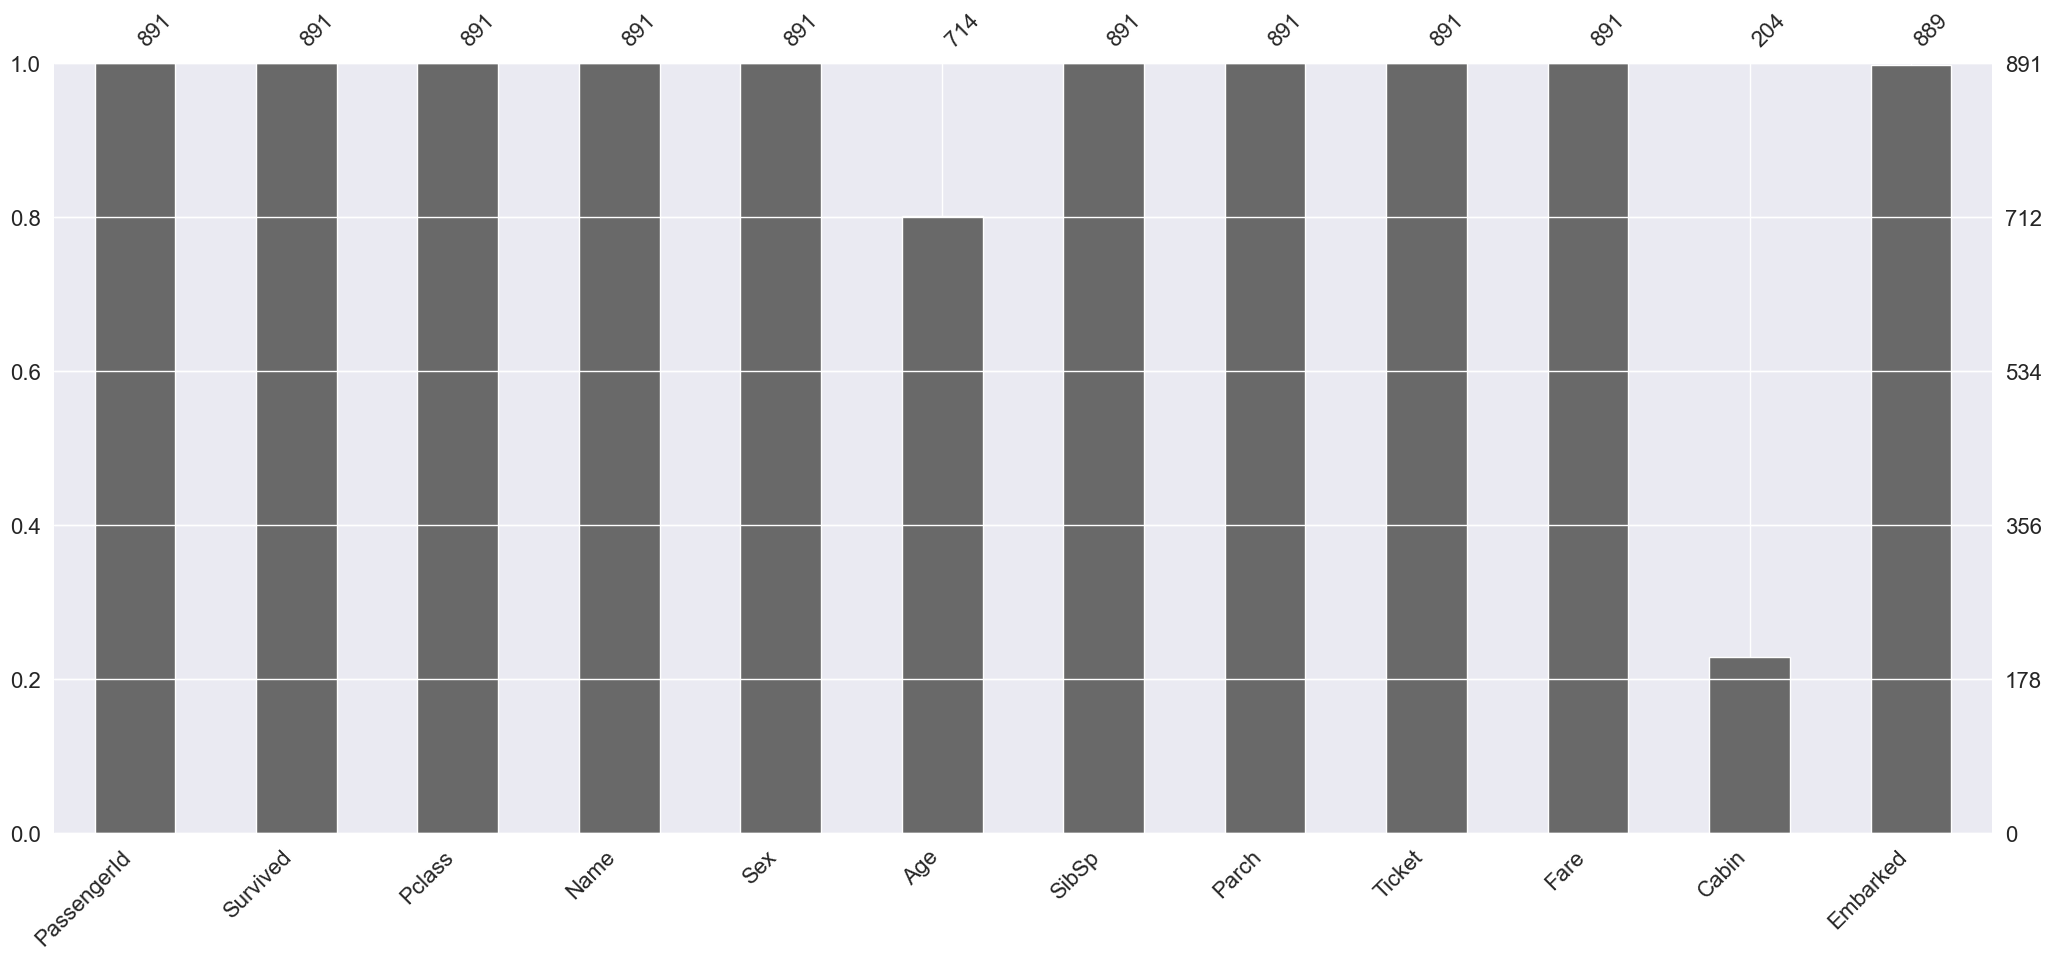

In [ ]:
msno.bar(titanic)

<Axes: >

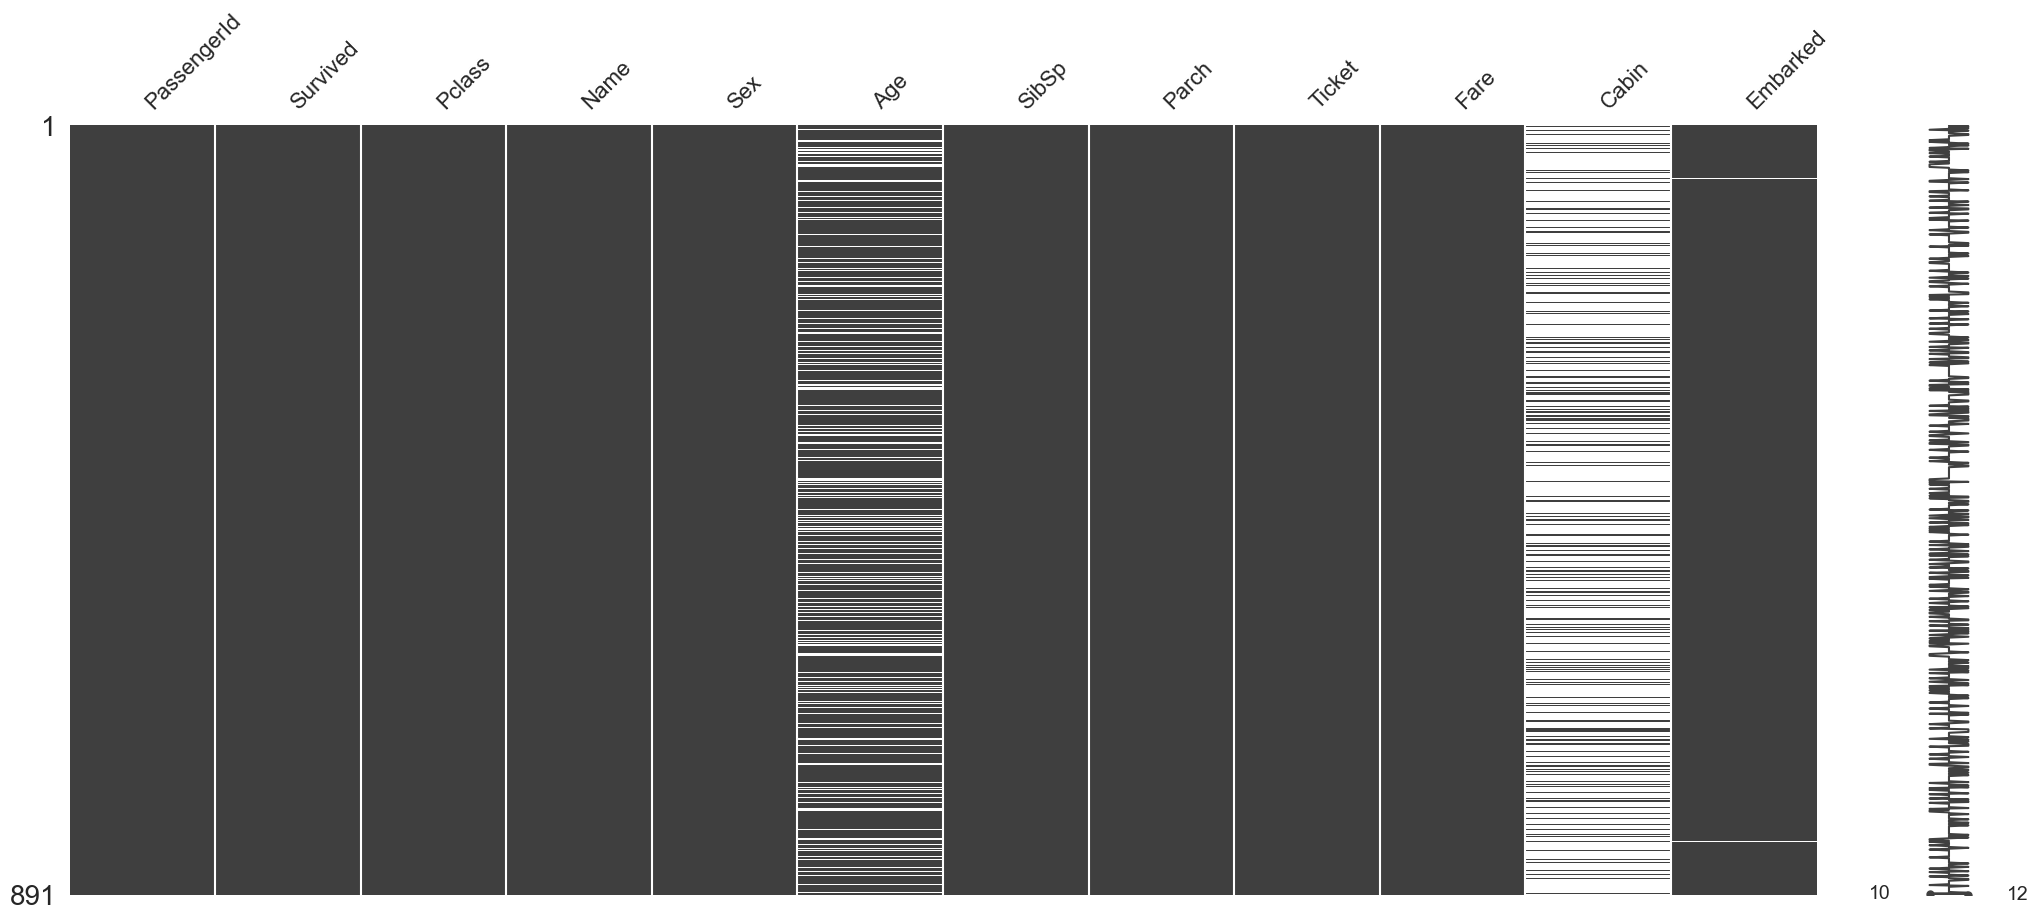

In [ ]:
msno.matrix(titanic)

In [ ]:
# Матрица корреляции пропущенных значений

In [ ]:
titanic[['Age','Cabin','Embarked']].isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


In [ ]:
df = titanic.iloc[:, [i for i, n in enumerate(np.var(titanic.isnull(), axis = 'rows')) if n > 0]]
df.isnull().corr()

,Age,Cabin,Embarked
Age,1.000000,0.144111,-0.023616
Cabin,0.144111,1.000000,-0.087042
Embarked,-0.023616,-0.087042,1.000000


<Axes: >

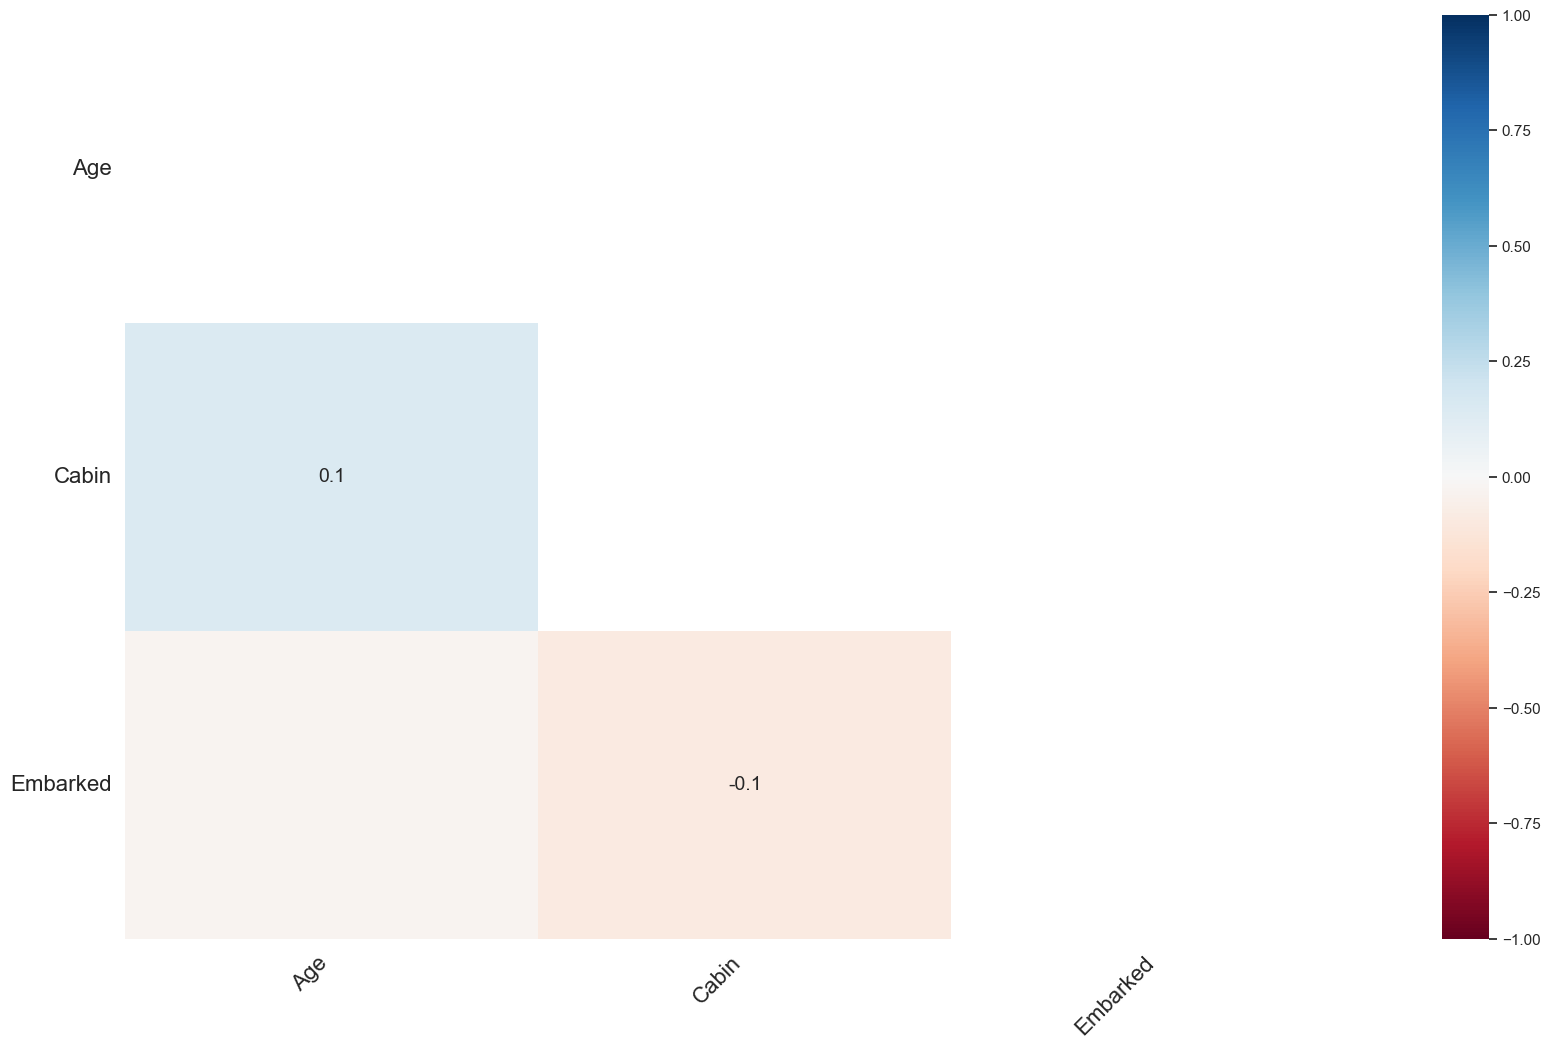

In [ ]:
msno.heatmap(titanic)

In [ ]:
# стратегии работы с пропусками

In [ ]:
# удаление пропусков

In [ ]:
# удаление строк

In [ ]:
# удаление строк обозначим через axis = 'index'
# subset = ['Embarked'] говорит о том, что мы ищем пропуски только в столбце Embarked
titanic.dropna(axis = 'index', subset = ['Embarked'], inplace = True)

In [ ]:
# убедимся, что в Embarked действительно не осталось пропусков
titanic.Embarked.isna().sum()

0

In [ ]:
# удаление столбцов

In [ ]:
# передадим в параметр columns тот столбец, который хотим удалить
titanic.drop(columns = ['Cabin'], inplace = True)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
sex_g = titanic.groupby('Sex').count()
sex_g

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,312,312,312,312,259,312,312,312,312,312
male,577,577,577,577,453,577,577,577,577,577


In [ ]:
# сравним количество пассажиров в столбце Age и столбце PassengerId
sex_g['PassengerId'].sum(), sex_g['Age'].sum()

(889, 712)

In [ ]:
# метод .mean() игнорирует пропуски и не выдает ошибки
titanic['Age'].mean()

29.64209269662921

In [ ]:
# то же можно сказать про метод .corr()
titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.093143
Fare,0.093143,1.000000


In [ ]:
# заполнение пропусков

In [ ]:
# возьмем лишь некоторые из столбцов
titanic = titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]
 
# закодируем столбец Sex с помощью числовых значений
map_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(map_dict)
 
# посмотрим на результат
titanic.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,0,1,0,7.2500,22.0,S
1,1,1,1,0,71.2833,38.0,C
2,3,1,0,0,7.9250,26.0,S
3,1,1,1,0,53.1000,35.0,S
4,3,0,0,0,8.0500,35.0,S


In [ ]:
# одномерные методы

In [ ]:
# вначале сделаем копию датасета
fillna_const = titanic.copy()
 
# заполним пропуски в столбце Age нулями, передав методу .fillna() словарь,
# где ключами будут названия столбцов, а значениями - константы для заполнения пропусков
fillna_const.fillna({'Age' : 0}, inplace = True)

In [ ]:
titanic.Age.median(), fillna_const.Age.median()

(28.0, 24.0)

In [ ]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
missing_embarked = pd.read_csv('train.csv')
missing_embarked[missing_embarked.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (Southampton)
fillna_const.Embarked.fillna('S', inplace = True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_14848\666460195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna_const.Embarked.fillna('S', inplace = True)


In [ ]:
# убедимся, что в столбцах Age и Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()

Age         0
Embarked    0
dtype: int64

In [ ]:
# сделаем копию датасета
const_imputer = titanic.copy()
 
# импортируем класс SimpleImputer из модуля impute библиотеки sklearn
from sklearn.impute import SimpleImputer
 
# создадим объект этого класса, указав,
# что мы будем заполнять константой strategy = 'constant', а именно нулем fill_value = 0
imp_const = SimpleImputer(strategy = 'constant', fill_value = 0)
 
# и обучим модель на столбце Age
# мы используем двойные скобки, потому что метод .fit() на вход принимает двумерный массив
imp_const.fit(const_imputer[['Age']])

SimpleImputer(fill_value=0, strategy='constant')

In [ ]:
# также используем двойные скобки с методом .transform()
const_imputer['Age'] = imp_const.transform(const_imputer[['Age']])
 
# убедимся, что пропусков не осталось и посчитаем количество нулевых значений
const_imputer.Age.isna().sum(), (const_imputer['Age'] == 0).sum()

(0, 177)

In [ ]:
# удалим его
const_imputer.drop(columns = ['Embarked'], inplace = True)
 
# и посмотрим на размер получившегося датафрейма
const_imputer.shape

(889, 6)

In [ ]:
# посмотрим на результат
const_imputer.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,0,1,0,7.2500,22.0
1,1,1,1,0,71.2833,38.0
2,3,1,0,0,7.9250,26.0


In [ ]:
# Заполнение средним арифметическим или медианой

In [ ]:
# сделаем копию датафрейма
fillna_median = titanic.copy()
 
# заполним пропуски в столбце Age медианным значением возраста,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median.Age.fillna(fillna_median.Age.median(), inplace = True)
 
# убедимся, что пропусков не осталось
fillna_median.Age.isna().sum()

C:\Users\Alex\AppData\Local\Temp\ipykernel_14848\2470732575.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fillna_median.Age.fillna(fillna_median.Age.median(), inplace = True)


0

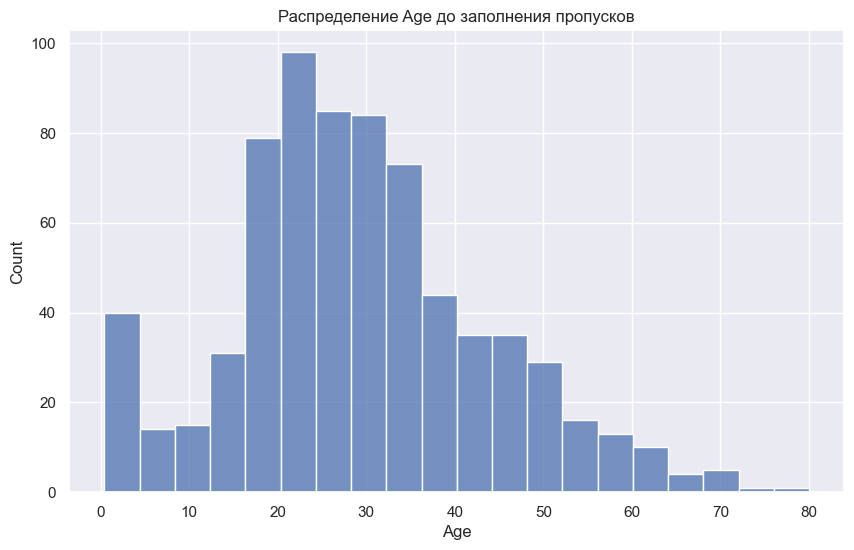

In [ ]:
# изменим размер последующих графиков
sns.set(rc = {'figure.figsize' : (10, 6)})
 
# скопируем датафрейм
median_imputer = titanic.copy()
 
# посмотрим на распределение возраста до заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age до заполнения пропусков');

In [ ]:
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.6, 28.0)

In [ ]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')
 
# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Age'] = imp_median.fit_transform(median_imputer[['Age']])
 
# убедимся, что пропущенных значений не осталось
median_imputer.Age.isna().sum()

0

Text(0.5, 1.0, 'Распределение Age после заполнения медианой')

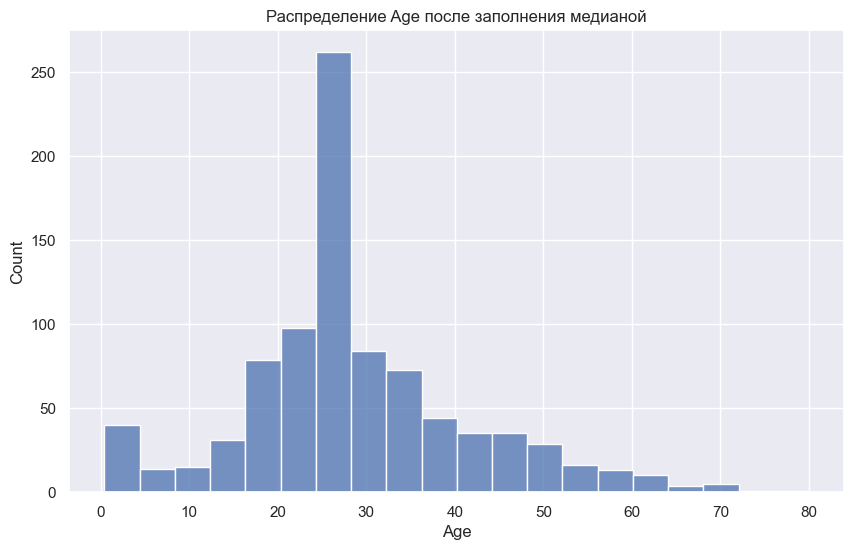

In [ ]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Age'], bins = 20)
plt.title('Распределение Age после заполнения медианой')

In [ ]:
# посмотрим на метрики после заполнения медианой
median_imputer['Age'].mean().round(1), median_imputer['Age'].median()

(29.3, 28.0)

In [ ]:
# столбец Embarked нам опять же не понадобится
median_imputer.drop(columns = ['Embarked'], inplace = True)
 
# посмотрим на размеры получившегося датафрейма
median_imputer.shape

KeyError: "['Embarked'] not found in axis"

In [ ]:
# Заполнение внутригрупповым значением

In [ ]:
# скопируем датафрейм
median_imputer_bins = titanic.copy()

In [ ]:
# сгруппируем пассажиров по полу и классу каюты
Age_bins = median_imputer_bins.groupby(['Sex', 'Pclass'])
 
# найдем медианный возраст с учетом получившихся групп
Age_bins.Age.median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# объект SeriesGroupBy находится в переменной Age_bins.Age,
# применим к нему lambda-функцию через метод .apply()
median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))

C:\Users\Alex\AppData\Local\Temp\ipykernel_14848\3828705926.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))


In [ ]:
# проверим пропуски в столбце Age
median_imputer_bins.Age.isna().sum()

0

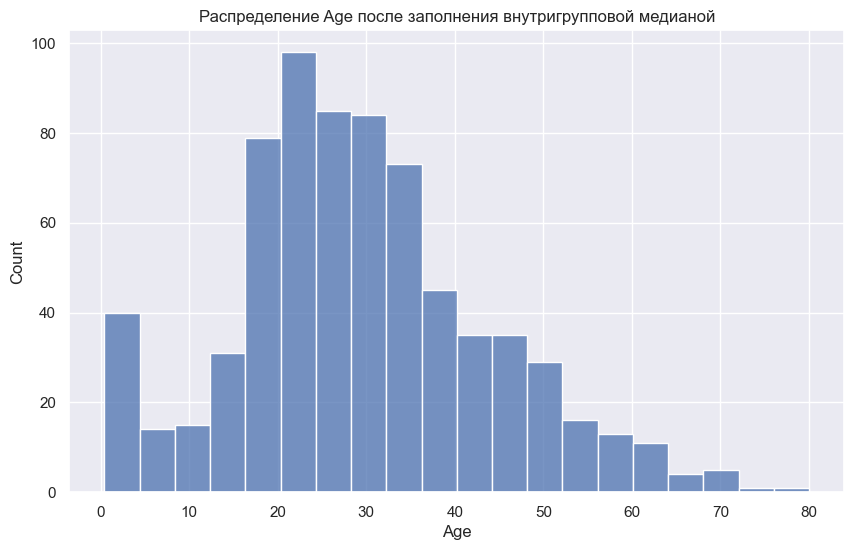

In [ ]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой');

In [ ]:
# столбец Embarked нам не понадобится
median_imputer_bins.drop(columns = ['Embarked'], inplace = True)
 
# посмотрим на размеры получившегося датафрейма
median_imputer_bins.shape

KeyError: "['Embarked'] not found in axis"

In [ ]:
# Заполнение наиболее частотным значением

In [ ]:
# скопируем датафрейм
titanic_mode = titanic.copy()
 
# посмотрим на распределение пассажиров по порту посадки до заполнения пропусков
titanic_mode.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [ ]:
# создадим объект класса SimpleImputer с параметром strategy = 'most_frequent'
imp_most_freq = SimpleImputer(strategy = 'most_frequent')
 
# применим метод .fit_transform() к столбцу Embarked
titanic_mode['Embarked'] = imp_most_freq.fit_transform(titanic_mode[['Embarked']])
 
# убедимся, что пропусков не осталось
titanic_mode.Embarked.isna().sum()


ValueError: 2

In [ ]:
# количество пассажиров в категории S должно увеличиться на два
titanic_mode.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [ ]:
titanic.Embarked.value_counts().index[0]

'S'

In [108]:
# для работы с последующими методами столбец Embarked нам уже не нужен
titanic.drop(columns = ['Embarked'], inplace = True)

In [109]:
# пропущенные значения (часть 2)

In [110]:
# многомерные методы